<a href="https://colab.research.google.com/github/oumnia-bdr/GratefulGivingProject/blob/main/SpamOrHamBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#install requirements
!pip install -U tensorflow
!pip install -U tensorflow-text
import tensorflow as tf
import tensorflow_text as text

In [36]:
#DataBase link: https://www.kaggle.com/code/karnikakapoor/spam-or-ham-sms-classifier/notebook
import pandas as pd

#df = pd.read_csv("spam.csv")
df = pd.read_csv("spam.csv", encoding='ISO-8859-1', engine='c')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [37]:
df.groupby('v1').describe()

v2                                                                 \
     count unique                                                top freq   
v1                                                                          
ham   4825   4516                             Sorry, I'll call later   30   
spam   747    653  Please call our customer service representativ...    4   

     Unnamed: 2                                                            \
          count unique                                                top   
v1                                                                          
ham          45     39   bt not his girlfrnd... G o o d n i g h t . . .@"   
spam          5      4                                        PO Box 5249   

          Unnamed: 3                                    Unnamed: 4         \
     freq      count unique                    top freq      count unique   
v1                                                                          
ham     3         10      9                     GE    2          6      5   
spam    2          2      1   MK17 92H. 450Ppw 16"    2          0      0   

                    
          top freq  
v1                  
ham   GNT:-)"    2  
spam      NaN  NaN

In [38]:
print(df.iloc[0])

v1                                                          ham
v2            Go until jurong point, crazy.. Available only ...
Unnamed: 2                                                  NaN
Unnamed: 3                                                  NaN
Unnamed: 4                                                  NaN
Name: 0, dtype: object


In [39]:
print(df['v1'].count())

5572


In [40]:
print(df['v1'].value_counts())

ham     4825
spam     747
Name: v1, dtype: int64


In [41]:
df_spam = df[df['v1'] == 'spam']
print('df_spam.shape', df_spam.shape)

df_spam.shape (747, 5)


In [42]:
df_ham = df[df['v1'] == 'ham']
print('df_ham.shape', df_ham.shape)

df_ham.shape (4825, 5)


In [43]:
df_ham_sample = df_ham.sample(df_spam.shape[0])
print('ham_sampled', df_ham_sample.shape)

ham_sampled (747, 5)


In [44]:
# now we have a balanced dataset 747 for sam and 747 for ham
df_balanced = pd.concat([df_spam, df_ham_sample])
print('shape of balanced data', df_balanced.shape)
print('values counts of data balanced ', df_balanced['v1'].value_counts())

shape of balanced data (1494, 5)
values counts of data balanced  spam    747
ham     747
Name: v1, dtype: int64


In [45]:
df_balanced['spam'] = df_balanced['v1'].apply(lambda x: 1 if x=='spam' else 0)
print("five sampples ", df_balanced.sample(5))

five sampples          v1                                                 v2 Unnamed: 2  \
5116   ham  Thanks. Fills me with complete calm and reassu...        NaN   
3057  spam  You are now unsubscribed all services. Get ton...        NaN   
3712   ham  If i not meeting Ì_ all rite then i'll go home...        NaN   
5442   ham  I thought i'd get him a watch, just cos thats ...        NaN   
4843  spam  YOU HAVE WON! As a valued Vodafone customer ou...        NaN   

     Unnamed: 3 Unnamed: 4  spam  
5116        NaN        NaN     0  
3057        NaN        NaN     1  
3712        NaN        NaN     0  
5442        NaN        NaN     0  
4843        NaN        NaN     1  


In [46]:
from sklearn.model_selection import train_test_split
#split our data
X_train, X_test, y_train, y_test = train_test_split(df_balanced['v2'],df_balanced['spam'], stratify=df_balanced['spam'])

In [47]:
print('train samples', X_train.head(4))

train samples 334     Valentines Day Special! Win over å£1000 in our...
3999    This is the 2nd time we have tried to contact ...
5467    Get your garden ready for summer with a FREE s...
3741    Hey i'm bored... So i'm thinking of u... So wa...
Name: v2, dtype: object


In [48]:
import tensorflow_hub as hub
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [49]:
def get_sentence_embeeding(sentences):
  preprocessed_text = bert_preprocess(sentences)
  return bert_encoder(preprocessed_text)['pooled_output'] # the encoder will return a dictionary


get_sentence_embeeding([

"there is a discount, hurry up",
"are you up for a voleyball game tomorrow"
])




<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.8582406 , -0.49212563, -0.89319295, ..., -0.648277  ,
        -0.7905583 ,  0.92909956],
       [-0.9070706 , -0.35875818, -0.49300554, ..., -0.27326325,
        -0.64557993,  0.93699294]], dtype=float32)>

In [50]:
from sklearn.metrics.pairwise import cosine_similarity

In [51]:
e = get_sentence_embeeding(["banana", "mango", "grapes", "bill gates"])

In [52]:
e

<tf.Tensor: shape=(4, 768), dtype=float32, numpy=
array([[-0.7606917 , -0.14219387,  0.49604616, ...,  0.4216533 ,
        -0.532214  ,  0.8031217 ],
       [-0.7128862 , -0.15463911,  0.38401636, ...,  0.35278714,
        -0.5099134 ,  0.73474103],
       [-0.86023223, -0.21242936,  0.49156916, ...,  0.39798027,
        -0.6050629 ,  0.8447166 ],
       [-0.78544384, -0.299497  ,  0.41027355, ...,  0.5222537 ,
        -0.4957357 ,  0.81507534]], dtype=float32)>

In [53]:
cosine_similarity([e[0]], [e[1]])

array([[0.99540985]], dtype=float32)

In [54]:
cosine_similarity([e[0]], [e[3]])

array([[0.9571838]], dtype=float32)

In [61]:
#create bert layers
text_input = tf.keras.layers.Input(shape = (), dtype = tf.string, name= "text")
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)


#create neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation="sigmoid", name="output")(l)



#use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])







In [56]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [62]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer_4 (KerasLayer)  {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                            

In [63]:
len(X_train)

1120

In [65]:
METRICS= [
    tf.keras.metrics.BinaryAccuracy(name="Accuracy"),
    tf.keras.metrics.Precision(name="Precision"),
    tf.keras.metrics.Recall(name="Recall"),
]
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics= METRICS

)


In [67]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
35/35 [==============================] - 625s 18s/step - loss: 0.6720 - Accuracy: 0.6089 - Precision: 0.6142 - Recall: 0.5857
Epoch 2/10
35/35 [==============================] - 605s 17s/step - loss: 0.5396 - Accuracy: 0.7732 - Precision: 0.7602 - Recall: 0.7982
Epoch 3/10
35/35 [==============================] - 606s 17s/step - loss: 0.4475 - Accuracy: 0.8491 - Precision: 0.8497 - Recall: 0.8482
Epoch 4/10
35/35 [==============================] - 608s 17s/step - loss: 0.4018 - Accuracy: 0.8661 - Precision: 0.8622 - Recall: 0.8714
Epoch 5/10
35/35 [==============================] - 602s 17s/step - loss: 0.3606 - Accuracy: 0.8884 - Precision: 0.8809 - Recall: 0.8982
Epoch 6/10
35/35 [==============================] - 609s 17s/step - loss: 0.3378 - Accuracy: 0.8848 - Precision: 0.8735 - Recall: 0.9000
Epoch 7/10
35/35 [==============================] - 613s 18s/step - loss: 0.3117 - Accuracy: 0.9009 - Precision: 0.8959 - Recall: 0.9071
Epoch 8/10
35/35 [=======================

In [68]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 207s 17s/step - loss: 0.2938 - Accuracy: 0.9198 - Precision: 0.9243 - Recall: 0.9144


[0.29381078481674194,
 0.9197860956192017,
 0.9243243336677551,
 0.9144384860992432]

In [75]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

12/12 [==============================] - 245s 20s/step


In [76]:
y_predicted

array([0.92300516, 0.9681553 , 0.17176074, 0.8266845 , 0.01367782,
       0.1378707 , 0.75079757, 0.9257214 , 0.88898605, 0.93926007,
       0.9787082 , 0.95978045, 0.8837229 , 0.8053162 , 0.02027633,
       0.94105285, 0.8403568 , 0.02345402, 0.9016513 , 0.70317066,
       0.69003105, 0.33716744, 0.96351063, 0.14254712, 0.709866  ,
       0.96740496, 0.08131   , 0.08624396, 0.311572  , 0.067473  ,
       0.8996362 , 0.996116  , 0.9212041 , 0.6857961 , 0.977271  ,
       0.46734792, 0.82526916, 0.91022396, 0.12992048, 0.5884009 ,
       0.84402215, 0.3182362 , 0.10147613, 0.02319365, 0.21521562,
       0.03859099, 0.52901554, 0.08219675, 0.88119626, 0.13482738,
       0.9226469 , 0.9661387 , 0.7937789 , 0.5985393 , 0.88630366,
       0.7215555 , 0.05676198, 0.05129753, 0.8996087 , 0.41992468,
       0.03073396, 0.7841312 , 0.01417708, 0.9705514 , 0.07209335,
       0.2895838 , 0.9247298 , 0.77799594, 0.24057922, 0.17581593,
       0.41627797, 0.08556399, 0.54047537, 0.11980065, 0.74152

In [77]:
import numpy as np

In [78]:
y_predicted = np.where(y_predicted > 0.5, 1, 0)

In [79]:
y_predicted

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,

In [80]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_predicted)

In [81]:
cm

array([[173,  14],
       [ 16, 171]])

Text(50.722222222222214, 0.5, 'Truth')

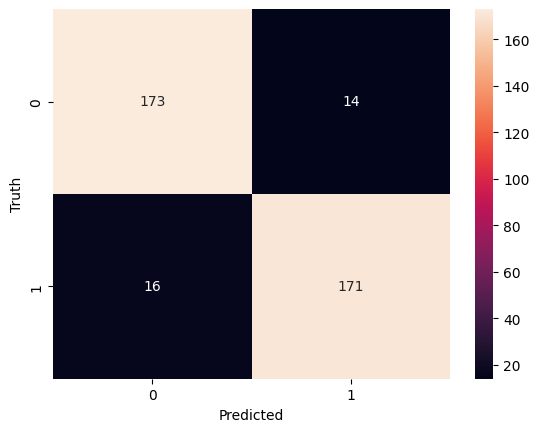

In [82]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")


In [83]:
print(
    classification_report(y_test, y_predicted)
)

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       187
           1       0.92      0.91      0.92       187

    accuracy                           0.92       374
   macro avg       0.92      0.92      0.92       374
weighted avg       0.92      0.92      0.92       374



In [84]:
reviews = [
    'Enter a chance to win $5000, hurry up, offer valid until march 31, 2021',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]


In [85]:
model.predict(reviews)

1/1 [==============================] - 7s 7s/step


array([[0.7737123 ],
       [0.80839324],
       [0.7841312 ],
       [0.17992379],
       [0.08479723]], dtype=float32)